<a href="https://colab.research.google.com/github/achalweise/Project-2/blob/main/Project_2_Part_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Dropout


## Data Clean Up

In [9]:
house_prices = pd.read_csv('/content/HousePrices_HalfMil.csv')
house_prices.head()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
0,164,2,0,2,0,1,0,0,3,1,1,1,1,0,0,43800
1,84,2,0,4,0,0,1,1,2,0,0,0,1,1,1,37550
2,190,2,4,4,1,0,0,0,2,0,0,1,0,0,0,49500
3,75,2,4,4,0,0,1,1,1,1,1,1,1,1,1,50075
4,148,1,4,2,1,0,0,1,2,1,0,0,1,1,1,52400


In [10]:
#Checking for duplicates
house_prices.duplicated().sum()
house_prices.drop_duplicates(inplace = True)

In [11]:
house_prices.duplicated().sum()

0

In [12]:
#identifying missing data 
house_prices.isna().sum()

Area             0
Garage           0
FirePlace        0
Baths            0
White Marble     0
Black Marble     0
Indian Marble    0
Floors           0
City             0
Solar            0
Electric         0
Fiber            0
Glass Doors      0
Swiming Pool     0
Garden           0
Prices           0
dtype: int64

In [13]:
#house_prices = house_prices.fillna(house_prices['Prices'].mean())

In [14]:
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494307 entries, 0 to 499999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Area           494307 non-null  int64
 1   Garage         494307 non-null  int64
 2   FirePlace      494307 non-null  int64
 3   Baths          494307 non-null  int64
 4   White Marble   494307 non-null  int64
 5   Black Marble   494307 non-null  int64
 6   Indian Marble  494307 non-null  int64
 7   Floors         494307 non-null  int64
 8   City           494307 non-null  int64
 9   Solar          494307 non-null  int64
 10  Electric       494307 non-null  int64
 11  Fiber          494307 non-null  int64
 12  Glass Doors    494307 non-null  int64
 13  Swiming Pool   494307 non-null  int64
 14  Garden         494307 non-null  int64
 15  Prices         494307 non-null  int64
dtypes: int64(16)
memory usage: 64.1 MB


In [15]:
#identifying inconsistencies 
house_prices.describe()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
count,494307.000000,494307.000000,494307.000000,494307.000000,494307.000000,494307.000000,494307.000000,494307.000000,494307.000000,494307.000000,494307.000000,494307.0000,494307.000000,494307.000000,494307.000000,494307.000000
mean,124.924472,2.001297,2.003221,2.998094,0.332965,0.332688,0.334347,0.499329,2.000939,0.498668,0.500519,0.5003,0.500001,0.500381,0.501628,42047.118137
std,71.799761,0.816986,1.413961,1.414055,0.471275,0.471176,0.471762,0.500000,0.816249,0.499999,0.500000,0.5000,0.500001,0.500000,0.499998,12108.362576
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,7725.000000
25%,63.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,33500.000000
50%,125.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.0000,1.000000,1.000000,1.000000,41850.000000
75%,187.000000,3.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,50750.000000
max,249.000000,3.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,77975.000000


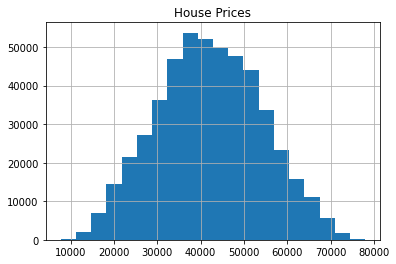

In [16]:
#producing a univariate visual
house_prices['Prices'].hist(bins=20)
plt.title('House Prices')
plt.show()

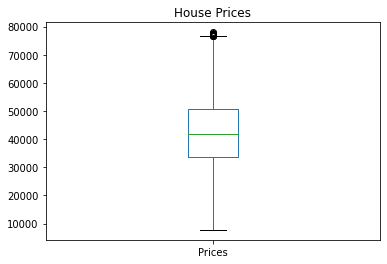

In [17]:
#identify Outliers
house_prices.boxplot(column = 'Prices', grid = False)
plt.title('House Prices')
plt.show()

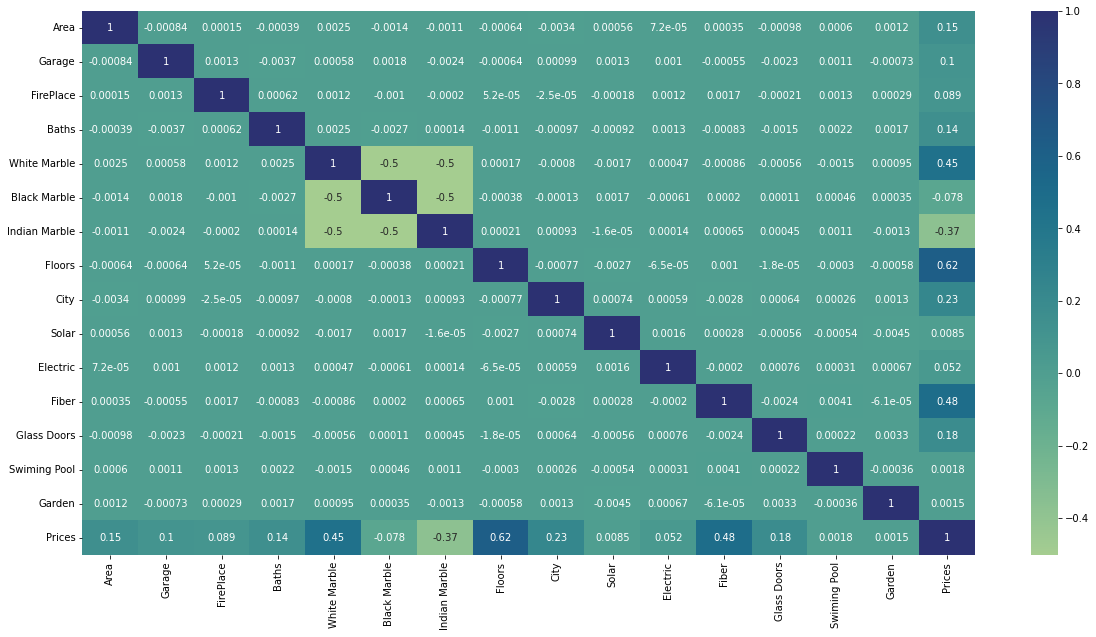

In [87]:
#Create a correlation heatmap
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(house_prices.corr(), annot=True, ax=ax, cmap="crest");

In [19]:
X = house_prices.drop(columns = 'Prices')
y = house_prices['Prices']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
house_prices['Area'].value_counts()
#one hot encode, change this to object
cat_selector = make_column_selector(dtype_include='object')
cat_selector(X_train)

train_cat_data = X_train[cat_selector(X_train)]
test_cat_data = X_test[cat_selector(X_test)]
train_cat_data

""
178522
433587
430426
431038
309667
...
260772
368954
132332
147373


In [21]:
ohe_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
#fit the OneHotEncoder on the training data
ohe_encoder.fit(train_cat_data)
#transform both the training and the testing data
train_ohe = ohe_encoder.transform(train_cat_data)
test_ohe = ohe_encoder.transform(test_cat_data)
train_ohe

array([], shape=(370730, 0), dtype=float64)

In [22]:
ohe_column_names = ohe_encoder.get_feature_names(train_cat_data.columns)
train_ohe = pd.DataFrame(train_ohe, columns=ohe_column_names)
test_ohe = pd.DataFrame(test_ohe, columns=ohe_column_names)
train_ohe

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


""
0
1
2
3
4
...
370725
370726
370727
370728


In [95]:
# Scale 
scaler = StandardScaler()

#impute mean for missing data under the AGE column 
mean_imputer = SimpleImputer(strategy='mean')

# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe.fit(X_train)

scaler.fit(X_train)
x_train_scaled = scaler.fit_transform(X_train)
x_train_scaled = scaler.fit_transform(X_test)

In [ ]:
# KNN model 
# Instantiate 
knn = KNeighborsRegressor()

# Make the pipeline
knn_pipe = make_pipeline(scaler, knn)

# Fit KNN model 
knn_pipe.fit(X_train, y_train)
# create training and testing predictions 
train_preds = knn_pipe.predict(X_train)
test_preds = knn_pipe.predict(X_test)

# Evaluation metrics on both the train and test sets. 
print('KNN Training RMSE:', np.sqrt(mean_squared_error(y_train, train_preds)))
print('KNN Testing RMSE:', np.sqrt(mean_squared_error(y_test, test_preds)))
print('------')
print('KNN Training R2:', r2_score(y_train, train_preds))
print('KNN Testing R2:', r2_score(y_test, test_preds))

In [31]:
#round predictions to 2 decimals 
preds = train_preds.round(decimals = 2)

In [89]:
from pandas._libs import index
#creating select highly correlated features, for visual presentation,  
X_train['Prices'] = train_preds
X_train['Prices']
solution = X_train[['Floors','Prices','Fiber', 'White Marble', 'City', 'Glass Doors' ]]
solution

,Floors,Prices,Fiber,White Marble,City,Glass Doors
178522,1,36100.0,0,0,3,0
433587,0,47215.0,1,0,3,1
430426,1,63530.0,1,1,1,1
431038,1,60165.0,1,0,3,1
309667,0,33460.0,1,0,3,0
...,...,...,...,...,...,...
260772,1,57030.0,1,0,3,0
368954,1,65870.0,1,1,3,0
132332,0,27070.0,1,0,1,0
147373,1,44990.0,0,0,3,0


In [91]:
#creating select highly correlated features, for visual presentation showing test data set.  
X_test['Prices'] = test_preds
X_test['Prices'] 
solution_test = X_test[['Floors','Prices','Fiber', 'White Marble', 'Glass Doors', 'City' ]]
solution_test

,Floors,Prices,Fiber,White Marble,Glass Doors,City
186036,0,33660.0,0,1,1,1
289734,0,50105.0,1,1,1,2
303824,0,45680.0,1,1,0,1
304109,0,29915.0,1,0,0,1
112859,0,54115.0,1,1,1,2
...,...,...,...,...,...,...
114990,1,50725.0,1,0,1,1
5372,0,45105.0,1,1,1,1
188056,0,48365.0,1,0,1,3
247616,0,35245.0,0,1,1,2


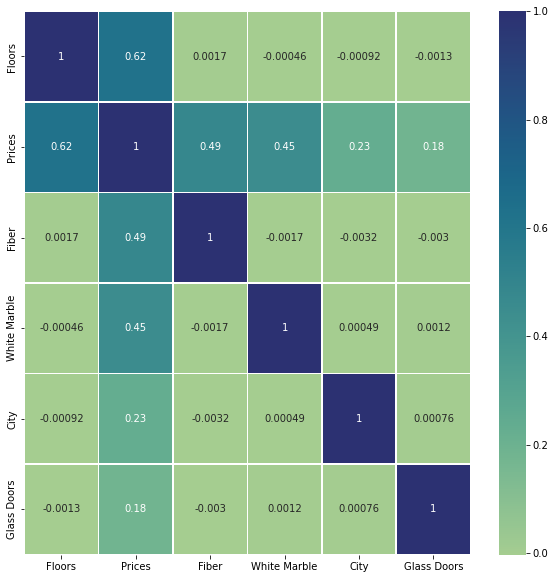

In [90]:
#training prediction heatmap 
plt.figure(figsize=(10, 10))
sns.heatmap(solution.corr(), annot=True, linewidths=0.5, cmap="crest")
plt.show()
#shows the features that affect price 

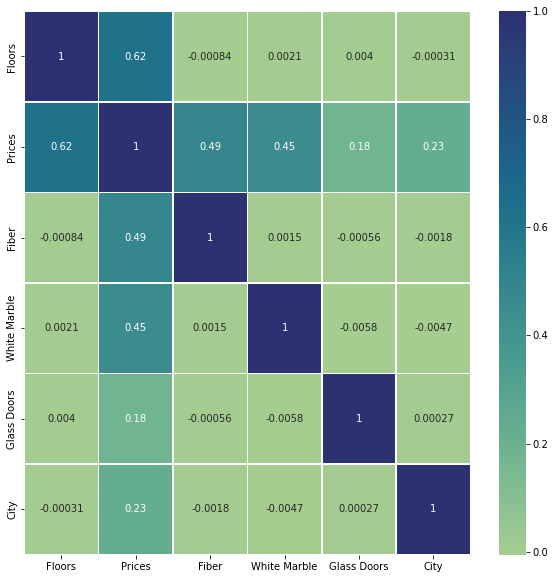

In [92]:
#testing prediction heatmap 
plt.figure(figsize=(10, 10))
sns.heatmap(solution_test.corr(), annot=True, linewidths=0.5, cmap="crest")
plt.show()
#shows the features that affect price 

In [18]:
#view hyperparameters
knn_pipe.get_params()

{'kneighborsregressor': KNeighborsRegressor(),
 'kneighborsregressor__algorithm': 'auto',
 'kneighborsregressor__leaf_size': 30,
 'kneighborsregressor__metric': 'minkowski',
 'kneighborsregressor__metric_params': None,
 'kneighborsregressor__n_jobs': None,
 'kneighborsregressor__n_neighbors': 5,
 'kneighborsregressor__p': 2,
 'kneighborsregressor__weights': 'uniform',
 'memory': None,
 'standardscaler': StandardScaler(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsregressor', KNeighborsRegressor())],
 'verbose': False}

In [19]:
#choose parameters to build model 
knn_params = {'kneighborsregressor__n_neighbors' : [5, 7, 9, 11],
              'kneighborsregressor__leaf_size' : [15, 20, 30]}

In [20]:
# Instantiate 
knn_gs = GridSearchCV(knn_pipe, knn_params)
knn_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsregressor',
                                        KNeighborsRegressor())]),
             param_grid={'kneighborsregressor__leaf_size': [15, 20, 30],
                         'kneighborsregressor__n_neighbors': [5, 7, 9, 11]})

In [21]:
print('KNN_GS Training RMSE:', np.sqrt(mean_squared_error(y_train, knn_gs.predict(X_train))))
print('KNN_GS Testing RMSE:', np.sqrt(mean_squared_error(y_test, knn_gs.predict(X_test))))
print('------')
print('KNN_GS Training R2:', r2_score(y_train, knn_gs.predict(X_train)))
print('KNN_GS Testing R2:', r2_score(y_test, knn_gs.predict(X_test)))

KNN_GS Training RMSE: 482.3369171999539
KNN_GS Testing RMSE: 608.0768622826633
------
KNN_GS Training R2: 0.9984137065070215
KNN_GS Testing R2: 0.9974754101186389


In [22]:
# Random Tree Regressor 
rf = RandomForestRegressor(random_state = 42)
# Make the pipeline 
rf_pipe = make_pipeline(scaler, rf)
# Fit
rf_pipe.fit(X_train, y_train)

# Evaluation metrics on both train and test sets
print('RF Training RMSE:', np.sqrt(mean_squared_error(y_train, rf_pipe.predict(X_train))))
print('RF Testing RMSE:', np.sqrt(mean_squared_error(y_test, rf_pipe.predict(X_test))))
print('------')
print('RF Training R2:', r2_score(y_train, rf_pipe.predict(X_train)))
print('RF Testing R2:', r2_score(y_test, rf_pipe.predict(X_test)))

RF Training RMSE: 86.05357292178437
RF Testing RMSE: 223.72739473839314
------
RF Training R2: 0.9999495082585382
RF Testing R2: 0.999658247098127


In [23]:
# view hyperparameters 
rf_pipe.get_params()

{'memory': None,
 'randomforestregressor': RandomForestRegressor(random_state=42),
 'randomforestregressor__bootstrap': True,
 'randomforestregressor__ccp_alpha': 0.0,
 'randomforestregressor__criterion': 'squared_error',
 'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 'auto',
 'randomforestregressor__max_leaf_nodes': None,
 'randomforestregressor__max_samples': None,
 'randomforestregressor__min_impurity_decrease': 0.0,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__min_weight_fraction_leaf': 0.0,
 'randomforestregressor__n_estimators': 100,
 'randomforestregressor__n_jobs': None,
 'randomforestregressor__oob_score': False,
 'randomforestregressor__random_state': 42,
 'randomforestregressor__verbose': 0,
 'randomforestregressor__warm_start': False,
 'standardscaler': StandardScaler(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std':

In [24]:
# Define the hyperparameters 
rf_params = {'randomforestregressor__max_depth' : [None, 5],
             'randomforestregressor__min_samples_split' : [2, 4]}

In [25]:
# Instantiate 
rf_gs = GridSearchCV(rf_pipe, rf_params)
rf_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'randomforestregressor__max_depth': [None, 5],
                         'randomforestregressor__min_samples_split': [2, 4]})

In [26]:
# Evaluation metrics 
print('RF_GS Training RMSE:', np.sqrt(mean_squared_error(y_train, rf_gs.predict(X_train))))
print('RF_GS Testing RMSE:', np.sqrt(mean_squared_error(y_test, rf_gs.predict(X_test))))
print('------')
print('RF_GS Training R2:', r2_score(y_train, rf_gs.predict(X_train)))
print('RF_GS Testing R2:', r2_score(y_test, rf_gs.predict(X_test)))

RF_GS Training RMSE: 86.05357292178437
RF_GS Testing RMSE: 223.72739473839314
------
RF_GS Training R2: 0.9999495082585382
RF_GS Testing R2: 0.999658247098127


In [27]:
# Evaluation metrics on both the train and test sets. 
print('KNN Training RMSE:', np.sqrt(mean_squared_error(y_train, knn_pipe.predict(X_train))))
print('KNN Testing RMSE:', np.sqrt(mean_squared_error(y_test, knn_pipe.predict(X_test))))
print('------')
print('KNN Training R2:', r2_score(y_train, knn_pipe.predict(X_train)))
print('KNN Testing R2:', r2_score(y_test, knn_pipe.predict(X_test)))

KNN Training RMSE: 482.33505187907986
KNN Testing RMSE: 608.1410041386235
------
KNN Training R2: 0.9984137187762073
KNN Testing R2: 0.9974748774872197


Based on the hypertuned parameters, I would go with the Random Forest Regressor since it had a better R2 score and a lower RMSE. Overall, both models did great, this could very well be a cause for concern, however, I'll accept the good numbers. 
